This file aimes to generate a combined analysis of all sources by counting the number of articles that were released per month

Here I just read through all the json files that I extracted through the webdriver in the other python files

In [1]:
import json

years = ['2021', '2022', '2023']

dps_results_map = {}
for year in years:
    
    f = open(f'archive/DPS/OLS/{year}.json')
    data = json.load(f)
    dps_results_map[year] = data

In [2]:
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


gov_results_map = {}
# gov_no_results_map = {}
for year in years:
    year_map = {}
    # no_year_map = {}
    
    if year == '2023':
        months = months[0:2]
    for i, month in enumerate(months):
        f = open(f'archive/OLS/{year}/{month}.json')
        data = json.load(f)
        year_map[month_names[i]] = data
        
    gov_results_map[year[2:]] = year_map

In [3]:
tmd_results_map = {}
# tmd_no_results_map = {}
for year in years:
    year_map = {}
    no_year_map = {}
    
    f = open(f'archive/TMD/OLS/{year}.json')
    data = json.load(f)
    tmd_results_map[year] = data

In [3]:
# manually count articles uploaded for each month 
dps_num = [0, 0, 0, 0, 3, 5, 2, 0, 5, 3, 2, 4, 3, 1, 0, 2, 2, 0, 0, 1, 3, 0, 1, 0, 0, 0]
tmd_num = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0]
len(dps_num)

26

In [24]:
sum(tmd_num)

10

In [25]:
# save all counts in a dict
num_art = {}
i = 0
gov_count = 0
for year, months in gov_results_map.items():
    for month, text in months.items():
        month_art = {}
        month_art['gov'] = len(text)
        gov_count += len(text)
        month_art['dps'] = dps_num[i]
        month_art['tmd'] = tmd_num[i]
        i+=1
        
        num_art[f'{month} {year}'] = month_art

print(gov_count)
num_art

93


{'Jan 21': {'gov': 0, 'dps': 0, 'tmd': 0},
 'Feb 21': {'gov': 0, 'dps': 0, 'tmd': 0},
 'Mar 21': {'gov': 5, 'dps': 0, 'tmd': 0},
 'Apr 21': {'gov': 2, 'dps': 0, 'tmd': 0},
 'May 21': {'gov': 1, 'dps': 3, 'tmd': 0},
 'Jun 21': {'gov': 1, 'dps': 5, 'tmd': 0},
 'Jul 21': {'gov': 0, 'dps': 2, 'tmd': 0},
 'Aug 21': {'gov': 3, 'dps': 0, 'tmd': 0},
 'Sep 21': {'gov': 5, 'dps': 5, 'tmd': 0},
 'Oct 21': {'gov': 3, 'dps': 3, 'tmd': 0},
 'Nov 21': {'gov': 2, 'dps': 2, 'tmd': 0},
 'Dec 21': {'gov': 2, 'dps': 4, 'tmd': 0},
 'Jan 22': {'gov': 0, 'dps': 3, 'tmd': 1},
 'Feb 22': {'gov': 4, 'dps': 1, 'tmd': 2},
 'Mar 22': {'gov': 5, 'dps': 0, 'tmd': 0},
 'Apr 22': {'gov': 10, 'dps': 2, 'tmd': 2},
 'May 22': {'gov': 5, 'dps': 2, 'tmd': 0},
 'Jun 22': {'gov': 4, 'dps': 0, 'tmd': 0},
 'Jul 22': {'gov': 6, 'dps': 0, 'tmd': 3},
 'Aug 22': {'gov': 5, 'dps': 1, 'tmd': 0},
 'Sep 22': {'gov': 5, 'dps': 3, 'tmd': 0},
 'Oct 22': {'gov': 5, 'dps': 0, 'tmd': 2},
 'Nov 22': {'gov': 5, 'dps': 1, 'tmd': 0},
 'Dec 22':

In [6]:
# delete empty months
del num_art['Jan 21']
del num_art['Feb 21']

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(font='Times New Roman')

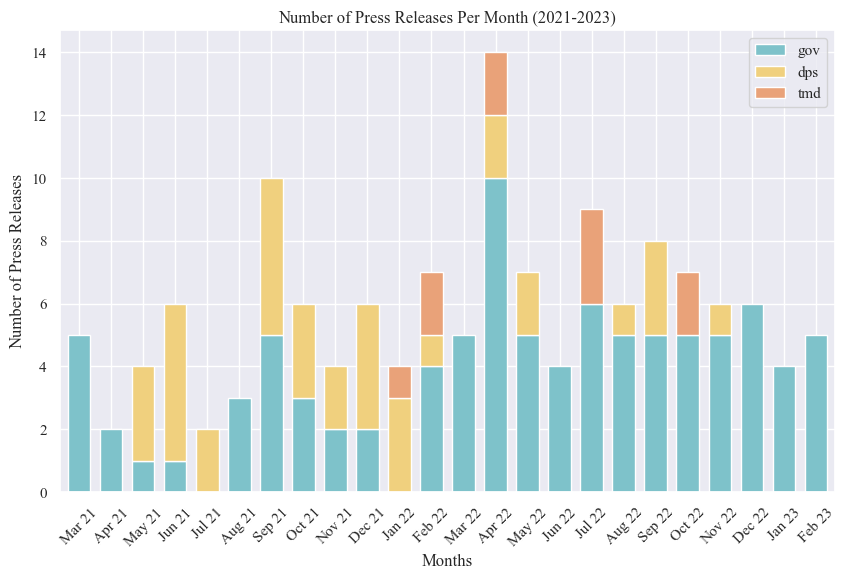

In [10]:
# save as pandas dataframe and graph using pyplot 

df = pd.DataFrame(num_art).T

sns.set(style="darkgrid")
my_palette = ['#7EC2CA', '#F0D07E', '#E9A279']
sns.set(font='Times New Roman')

ax = df.plot.bar(stacked=True, figsize=(10, 6), color=my_palette, width=0.7)

plt.xticks(rotation=45)
ax.set_xlabel('Months')
ax.set_ylabel('Number of Press Releases')
ax.set_title('Number of Press Releases Per Month (2021-2023)')
ax.legend()

plt.savefig('images/num_art_all.png')
plt.show()

## Trigram Analysis

In [5]:
import pandas as pd

In [17]:
# function to replace a list of words with another word
def rep(s, words):
    for key in words:
        for value in words[key]:
            s = s.replace(value, key)
    return s

In [67]:
# 3-gram analysis
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter


# stop words for 3-grams
stop_words = set(stopwords.words('english'))
new_words = {'texas', 'operation', 'lone', 'star', 'us', 'ols', 'said', 'state', 'pdf', 'adobe', 'reader', 'one',
            'two', 'u', 'page', 'dps'}
stop_words = stop_words.union(new_words)

words_to_replace = {
    'dps': ['department of public safety', 'txdps', 'txdeptpublicsafety'],
    'request': ['requests'],
    'abbott': ['governor greg abbott', 'governor abbott', 'governor', 'gov'],
    'biden': ['president']
}

tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b')
dps_trigrams = []

# for each tweet, tokenize, remove stop words, and add 3-grams to list

for year, m in dps_results_map.items():
    for key, value in m.items():
        t = value[:value.find('@txdps')]
        t = rep(t, words_to_replace)
        tokens = tokenizer.tokenize(t.lower())
        filtered_tokens = [token for token in tokens if token not in stop_words]
        tri = ngrams(filtered_tokens, 3)
        dps_trigrams += tri
        
# organize 3-grams by frequency of appearance 
dps_trigram_freq = Counter(dps_trigrams)
print(dps_trigram_freq.most_common(20))

[(('criminal', 'investigations', 'division'), 20), (('director', 'steven', 'mccraw'), 18), (('received', 'lifesaving', 'award'), 18), (('de', 'la', 'garza'), 16), (('lifesaving', 'award', 'actions'), 15), (('highway', 'patrol', 'trooper'), 14), (('military', 'department', 'tmd'), 12), (('regional', 'headquarters', 'weslaco'), 11), (('austin', 'military', 'department'), 10), (('highway', 'patrol', 'headquarters'), 10), (('patrol', 'headquarters', 'sgt'), 9), (('briefing', 'held', 'regional'), 8), (('held', 'regional', 'headquarters'), 8), (('patrol', 'trooper', 'stopped'), 8), (('trooper', 'stopped', 'vehicle'), 8), (('lt', 'christopher', 'olivarez'), 7), (('award', 'actions', 'sept'), 7), (('abbott', 'greg', 'abbott'), 7), (('county', 'sheriff', 'office'), 6), (('driver', 'year', 'old'), 6)]


In [68]:
# more experimenting with formatting
df_dps_tri = pd.DataFrame(list(dps_trigram_freq.items()), columns=['Trigram', 'Frequency'])
dps_top15 = df_dps_tri.sort_values('Frequency', ascending=False).head(15)

print("3-grams for DPS Press Releases")
print(dps_top15)
dps_top15.to_csv('Trigrams/Press Releases/dps_trigrams.csv', index=False)

3-grams for DPS Press Releases
                                   Trigram  Frequency
100   (criminal, investigations, division)         20
70              (director, steven, mccraw)         18
285          (received, lifesaving, award)         18
525                        (de, la, garza)         16
286           (lifesaving, award, actions)         15
2650            (highway, patrol, trooper)         14
1              (military, department, tmd)         12
12       (regional, headquarters, weslaco)         11
0           (austin, military, department)         10
7593       (highway, patrol, headquarters)         10
7594           (patrol, headquarters, sgt)          9
11          (held, regional, headquarters)          8
10              (briefing, held, regional)          8
2652           (trooper, stopped, vehicle)          8
2651            (patrol, trooper, stopped)          8


In [69]:
def TupleToString(tup):
    a, b, c = t
    return f'({a}, {b}, {c})'

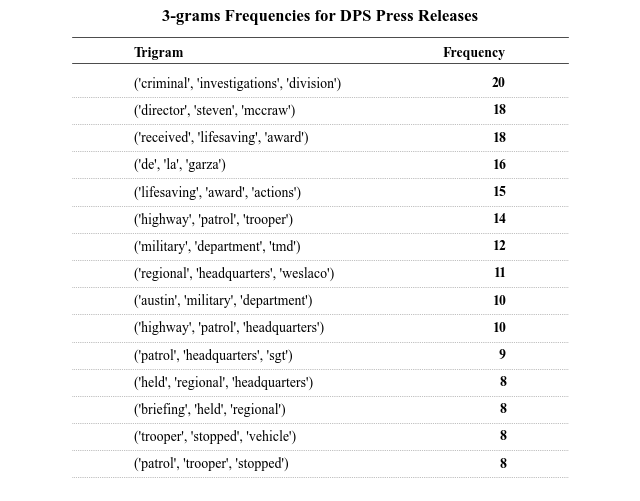

In [70]:
import matplotlib.pyplot as plt
# Custom format my own table to display trigrams
plt.rcParams['font.family'] = 'Times New Roman'

fig, ax = plt.subplots(figsize=(8,6))
rows = len(dps_top15)
cols = len(dps_top15.columns)

ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + .5)

for i, (_, row) in enumerate(dps_top15.iterrows()):

    ax.text(x=.5, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
    ax.text(x=2, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')
    
ax.text(.5, 15, 'Trigram', weight='bold', ha='left')
ax.text(2, 15, 'Frequency', weight='bold', ha='right')

for row in range(rows):
    ax.plot(
        [cols-1.75, cols+0.25],
        [row -.5, row - .5],
        ls=':',
        lw='.5',
        c='grey'
    )
    
ax.plot([cols-1.75, cols+0.25], [14.75, 14.75], lw='.5', c='black')
ax.plot([cols-1.75, cols+0.25], [15.7, 15.7], lw='.5', c='black')

ax.axis('off')
ax.set_title(
    '3-grams Frequencies for DPS Press Releases',
    loc='center',
    fontsize=12,
    weight='bold'
)

plt.savefig('Trigrams/Press Releases/dps_trigrams.png', dpi=250)

In [80]:
# 3-gram analysis
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter


# stop words for 3-grams
stop_words = set(stopwords.words('english'))
new_words = {'texas', 'operation', 'lone', 'star', 'us', 'ols', 'said', 'state', 'pdf', 'adobe', 'reader', 'one',
            'two', 'u', 'page', 'dps', 'austin'}
stop_words = stop_words.union(new_words)

words_to_replace = {
    'dps': ['department of public safety', 'txdps', 'txdeptpublicsafety'],
    'request': ['requests'],
    'abbott': ['governor greg abbott', 'governor abbott', 'governor', 'gov'],
    'biden': ['president']
}

tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b')
tmd_trigrams = []

# for each tweet, tokenize, remove stop words, and add 3-grams to list

for year, m in tmd_results_map.items():
    for key, value in m.items():
        t = value[:value.find('-30-')]
        t = rep(t, words_to_replace)
        tokens = tokenizer.tokenize(t.lower())
        filtered_tokens = [token for token in tokens if token not in stop_words]
        tri = ngrams(filtered_tokens, 3)
        tmd_trigrams += tri
        
# organize 3-grams by frequency of appearance 
tmd_trigram_freq = Counter(tmd_trigrams)
print(tmd_trigram_freq.most_common(20))

[(('contact', 'military', 'department'), 11), (('military', 'department', 'public'), 11), (('department', 'public', 'affairs'), 11), (('public', 'affairs', 'office'), 11), (('media', 'representatives', 'wishing'), 9), (('representatives', 'wishing', 'obtain'), 9), (('wishing', 'obtain', 'information'), 9), (('obtain', 'information', 'contact'), 9), (('information', 'contact', 'military'), 9), (('immediate', 'public', 'release'), 9), (('media', 'advisory', 'media'), 7), (('advisory', 'media', 'representatives'), 7), (('affairs', 'office', 'ng'), 7), (('office', 'ng', 'tx'), 7), (('ng', 'tx', 'txarng'), 7), (('tx', 'txarng', 'mbx'), 7), (('txarng', 'mbx', 'pao'), 7), (('mbx', 'pao', 'army'), 7), (('pao', 'army', 'mil'), 7), (('army', 'mil', 'immediate'), 7)]


In [81]:
# more experimenting with formatting
df_tmd_tri = pd.DataFrame(list(tmd_trigram_freq.items()), columns=['Trigram', 'Frequency'])
tmd_top15 = df_tmd_tri.sort_values('Frequency', ascending=False).head(15)

print("3-grams for TMD Press Releases")
print(tmd_top15)
tmd_top15.to_csv('Trigrams/Press Releases/tmd_trigrams.csv', index=False)

3-grams for TMD Press Releases
                                Trigram  Frequency
217       (department, public, affairs)         11
216      (military, department, public)         11
215     (contact, military, department)         11
218           (public, affairs, office)         11
210   (media, representatives, wishing)          9
224        (immediate, public, release)          9
214    (information, contact, military)          9
211  (representatives, wishing, obtain)          9
212      (wishing, obtain, information)          9
213      (obtain, information, contact)          9
332                    (mbx, pao, army)          7
331                  (txarng, mbx, pao)          7
329                    (ng, tx, txarng)          7
328                    (office, ng, tx)          7
327               (affairs, office, ng)          7


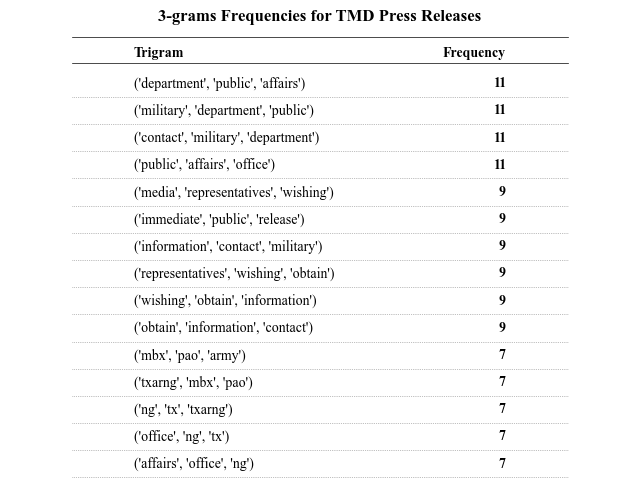

In [83]:
import matplotlib.pyplot as plt
# Custom format my own table to display trigrams
plt.rcParams['font.family'] = 'Times New Roman'

fig, ax = plt.subplots(figsize=(8,6))
rows = len(tmd_top15)
cols = len(tmd_top15.columns)

ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + .5)

for i, (_, row) in enumerate(tmd_top15.iterrows()):

    ax.text(x=.5, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
    ax.text(x=2, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')
    
ax.text(.5, 15, 'Trigram', weight='bold', ha='left')
ax.text(2, 15, 'Frequency', weight='bold', ha='right')

for row in range(rows):
    ax.plot(
        [cols-1.75, cols+0.25],
        [row -.5, row - .5],
        ls=':',
        lw='.5',
        c='grey'
    )
    
ax.plot([cols-1.75, cols+0.25], [14.75, 14.75], lw='.5', c='black')
ax.plot([cols-1.75, cols+0.25], [15.7, 15.7], lw='.5', c='black')

ax.axis('off')
ax.set_title(
    '3-grams Frequencies for TMD Press Releases',
    loc='center',
    fontsize=12,
    weight='bold'
)

plt.savefig('Trigrams/Press Releases/tmd_trigrams.png', dpi=250)

In [93]:
# 3-gram analysis
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter


# stop words for 3-grams
stop_words = set(stopwords.words('english'))
new_words = {'texas', 'operation', 'lone', 'star', 'us', 'ols', 'said', 'state', 'pdf', 'adobe', 'reader', 'one',
            'two', 'u', 'page', 'dps', 'austin', 'press', 'release'}
stop_words = stop_words.union(new_words)

words_to_replace = {
    'dps': ['department of public safety', 'txdps', 'txdeptpublicsafety'],
    'request': ['requests'],
    'abbott': ['governor greg abbott', 'governor abbott', 'governor', 'gov'],
    'biden': ['president biden', 'president']
}

tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b')
gov_trigrams = []

# for each tweet, tokenize, remove stop words, and add 3-grams to list

for _, m in gov_results_map.items():
    for _, v in m.items():
        for title, text in v.items():
            t = rep(text, words_to_replace)
            tokens = tokenizer.tokenize(t.lower())
            filtered_tokens = [token for token in tokens if token not in stop_words]
            tri = ngrams(filtered_tokens, 3)
            gov_trigrams += tri
        
# organize 3-grams by frequency of appearance 
gov_trigram_freq = Counter(gov_trigrams)
print(gov_trigram_freq.most_common(20))

[(('open', 'border', 'policies'), 99), (('national', 'guard', 'soldiers'), 73), (('referred', 'border', 'patrol'), 69), (('biden', 'open', 'border'), 67), (('refusal', 'secure', 'border'), 52), (('abbott', 'national', 'guard'), 51), (('lt', 'chris', 'olivarez'), 51), (('interdict', 'transnational', 'criminal'), 50), (('biden', 'administration', 'refusal'), 48), (('secure', 'border', 'stop'), 48), (('million', 'lethal', 'doses'), 48), (('prevent', 'detect', 'interdict'), 48), (('detect', 'interdict', 'transnational'), 48), (('transnational', 'criminal', 'behavior'), 48), (('administration', 'refusal', 'secure'), 47), (('smuggling', 'drugs', 'weapons'), 47), (('drugs', 'weapons', 'people'), 47), (('since', 'launch', 'multi'), 47), (('launch', 'multi', 'agency'), 47), (('criminal', 'behavior', 'ports'), 46)]


In [94]:
# more experimenting with formatting
df_gov_tri = pd.DataFrame(list(gov_trigram_freq.items()), columns=['Trigram', 'Frequency'])
gov_top15 = df_gov_tri.sort_values('Frequency', ascending=False).head(15)

print("3-grams for TMD Press Releases")
print(gov_top15)
gov_top15.to_csv('Trigrams/Press Releases/gov_trigrams.csv', index=False)

3-grams for TMD Press Releases
                                   Trigram  Frequency
80                (open, border, policies)         99
1977           (national, guard, soldiers)         73
9775            (referred, border, patrol)         69
1000                 (biden, open, border)         67
245              (refusal, secure, border)         52
5922                 (lt, chris, olivarez)         51
4275             (abbott, national, guard)         51
4287  (interdict, transnational, criminal)         50
4285          (prevent, detect, interdict)         48
243       (biden, administration, refusal)         48
968                 (secure, border, stop)         48
4286    (detect, interdict, transnational)         48
1136              (million, lethal, doses)         48
4288   (transnational, criminal, behavior)         48
1765           (smuggling, drugs, weapons)         47


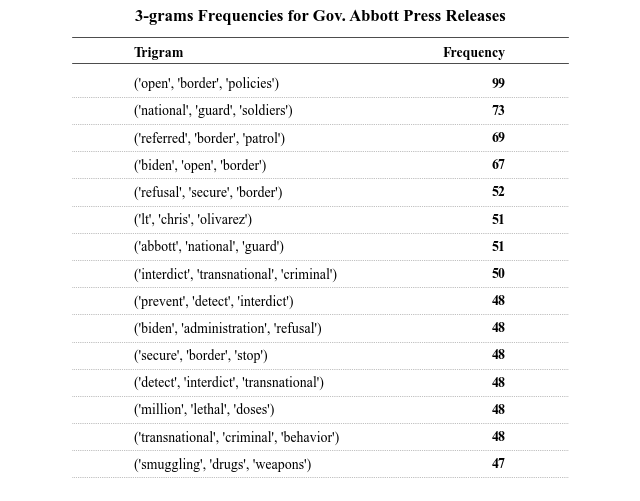

In [95]:
import matplotlib.pyplot as plt
# Custom format my own table to display trigrams
plt.rcParams['font.family'] = 'Times New Roman'

fig, ax = plt.subplots(figsize=(8,6))
rows = len(gov_top15)
cols = len(gov_top15.columns)

ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + .5)

for i, (_, row) in enumerate(gov_top15.iterrows()):

    ax.text(x=.5, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
    ax.text(x=2, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')
    
ax.text(.5, 15, 'Trigram', weight='bold', ha='left')
ax.text(2, 15, 'Frequency', weight='bold', ha='right')

for row in range(rows):
    ax.plot(
        [cols-1.75, cols+0.25],
        [row -.5, row - .5],
        ls=':',
        lw='.5',
        c='grey'
    )
    
ax.plot([cols-1.75, cols+0.25], [14.75, 14.75], lw='.5', c='black')
ax.plot([cols-1.75, cols+0.25], [15.7, 15.7], lw='.5', c='black')

ax.axis('off')
ax.set_title(
    '3-grams Frequencies for Gov. Abbott Press Releases',
    loc='center',
    fontsize=12,
    weight='bold'
)

plt.savefig('Trigrams/Press Releases/gov_trigrams.png', dpi=250)

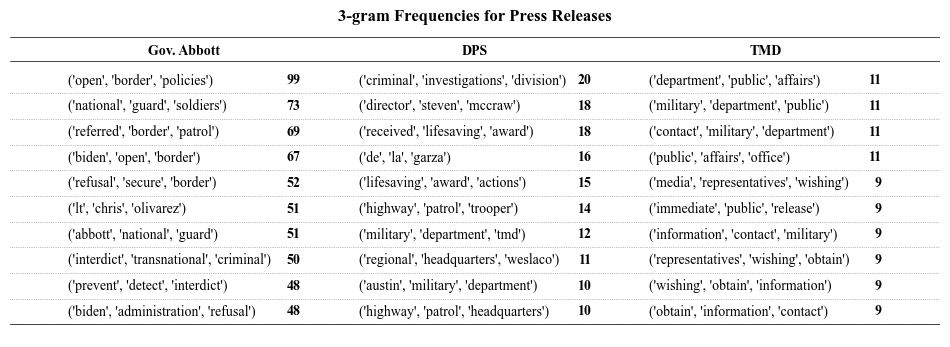

In [100]:
# same table but for only top 10 trigrams of each account
gov_top10 = df_gov_tri.sort_values('Frequency', ascending=False).head(10)
dps_top10 = df_dps_tri.sort_values('Frequency', ascending=False).head(10)
tmd_top10 = df_tmd_tri.sort_values('Frequency', ascending=False).head(10)

plt.rcParams['font.family'] = 'Times New Roman'

fig, ax = plt.subplots(figsize=(12,4))
rows = len(gov_top10)
cols = len(gov_top10.columns)*3

ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + 2)

for i, (_, row) in enumerate(gov_top10.iterrows()):
    ax.text(x=0.5, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
    ax.text(x=2.5, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')
    
for i, (_, row) in enumerate(dps_top10.iterrows()):
    ax.text(x=3, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
    ax.text(x=5, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')

for i, (_, row) in enumerate(tmd_top10.iterrows()):
    ax.text(x=5.5, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
    ax.text(x=7.5, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')
    
ax.text(1.5, 10, 'Gov. Abbott', weight='bold', ha='center')
ax.text(4, 10, 'DPS', weight='bold', ha='center')
ax.text(6.5, 10, 'TMD', weight='bold', ha='center')


for row in range(rows):
    ax.plot(
        [0, cols+2],
        [row -.5, row - .5],
        ls=':',
        lw='.5',
        c='grey'
    )
    
ax.plot([0, cols+2], [-0.5, -0.5], lw='.5', c='black')
ax.plot([0, cols+2], [9.75, 9.75], lw='.5', c='black')
ax.plot([0, cols+2], [10.7, 10.7], lw='.5', c='black')

ax.axis('off')
ax.set_title(
    '3-gram Frequencies for Press Releases',
    loc='center',
    fontsize=12,
    weight='bold'
)

plt.savefig('Trigrams/Press Releases/combined_10trigrams.png', dpi=250)

## Gov + DPS

In [144]:
freqs = pd.read_csv('Gov_top10.csv')
temp = pd.read_csv('DPS_top10.csv')
freqs.columns = ['word', 'Gov']
freqs['DPS'] = temp['freq']
# freqs = freqs.set_index('word')
freqs

,word,Gov,DPS
0,border,2.171399,0.592713
1,dps,1.259966,1.659596
2,abbott,1.236834,0.324432
3,biden,1.005506,0.018717
4,illegal,0.991626,0.237085
5,immigrants,0.635381,0.112303
6,guard,0.538223,0.112303
7,national guard,0.513548,0.000000
8,secure,0.434897,0.162216
9,smuggling,0.397884,0.143499


In [145]:
import seaborn as sns

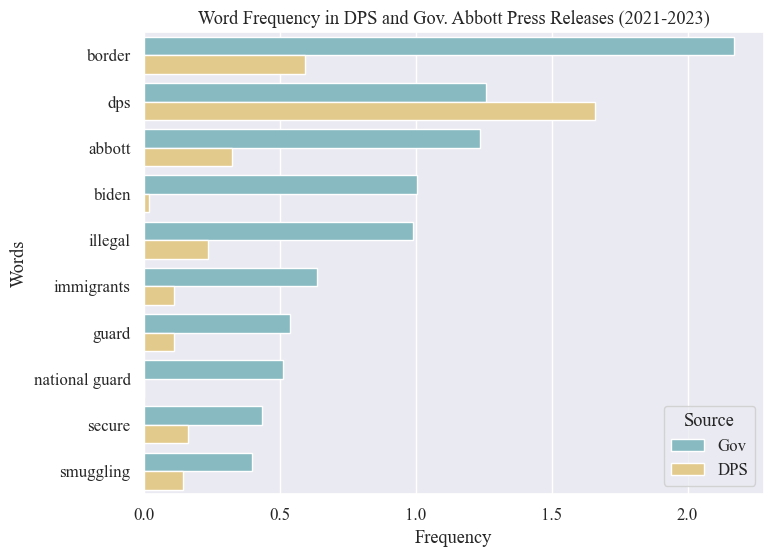

In [151]:
melted_data = freqs.melt(id_vars='word', var_name='Source', value_name='frequency')

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1, font='Times New Roman', palette=my_palette)
# sns.set_palette(my_palette)

ax = sns.barplot(x='frequency', y='word', hue='Source', data=melted_data)

ax.set_ylabel('Words')
ax.set_xlabel('Frequency')
ax.set_title('Word Frequency in DPS and Gov. Abbott Press Releases (2021-2023)')

plt.savefig('images/DPS-Gov_press_releases.png', bbox_inches='tight', dpi=300)


In [121]:
# generate stacked bar graph 
sns.set(style="darkgrid")
my_palette = ['#7EC2CA', '#F0D07E', '#E9A279']
sns.set(font='Times New Roman')

ax = freqs.plot.bar(figsize=(8, 6), color=my_palette, width=0.7)

plt.xticks(rotation=45)
ax.set_xlabel('Months')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets Per Month (2021-2023)')
ax.legend()

# plt.savefig('images/all_tweets.png', bbox_inches='tight', dpi=300)
plt.show()

KeyError: 'word'

## Experimental code 

ValueError: 'upper' is not a valid value for align; supported values are 'top', 'bottom', 'center', 'baseline', 'center_baseline'

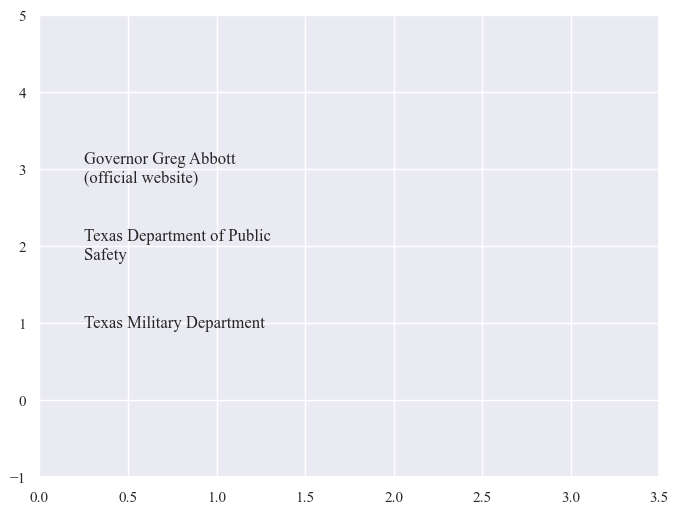

In [21]:
plt.rcParams['font.family'] = 'Times New Roman'

fig, ax = plt.subplots(figsize=(8,6))
rows = 4
cols = 3

ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + .5)

ax.text(x=.25, y=3, s='Governor Greg Abbott \n(official website)', va='center', ha='left')
ax.text(x=.25, y=2, s='Texas Department of Public \nSafety', va='center', ha='left')
ax.text(x=.25, y=1, s='Texas Military Department', va='center', ha='left')

ax.text(x=2, y=3, s='https://gov.texas.gov/news/category/press-release', va='center', ha='left')


# for i, (_, row) in enumerate(df_top15.iterrows()):

#     ax.text(x=.5, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
#     ax.text(x=2, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')
    
# ax.text(.5, 15, 'Trigram', weight='bold', ha='left')
# ax.text(2, 15, 'Frequency', weight='bold', ha='right')

# for row in range(rows):
#     ax.plot(
#         [cols-1.75, cols+0.25],
#         [row -.5, row - .5],
#         ls=':',
#         lw='.5',
#         c='grey'
#     )
    
# ax.plot([cols-1.75, cols+0.25], [14.75, 14.75], lw='.5', c='black')
# # ax.plot([cols-1.75, cols+0.25], [14.65, 14.65], lw='.5', c='black')

# ax.plot([cols-1.75, cols+0.25], [15.7, 15.7], lw='.5', c='black')
# # ax.plot([cols-1.75, cols+0.25], [15.6, 15.6], lw='.5', c='black')

# ax.axis('off')
# ax.set_title(
#     '3-grams Frequencies for Gov. Abbott Tweets',
#     loc='center',
#     fontsize=12,
#     weight='bold'
# )

# plt.savefig('Trigrams/gov_trigrams.png')